## Inicialización

Primero cargamos las todas las librerías que vamos a necesitar en el proyecto.

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargar datos

Cargamos nuestro DataFrame para hacer el primer análisis.

In [3]:
vehicles = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

In [4]:
# imprime la información general/resumida sobre el DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# imprimir una muestra de datos
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
vehicles.shape

(51525, 13)

### Conclusiones y siguientes pasos

Lo primero que se puede notar al analizar la información general impresa y la muestra de la tabla es que tenemos algunas columnas con valores ausentes. Vamos a tener que analizar cada una de estas columnas y encontrar las razones de la ausencia de valores y encontrar la manera de solucionar esta problemática. Las siguientes columnas son las que necesitamos analizar:

`model_year`

`cylinders`

`odometer`

`paint_color`

`is_4wd`

Tambien pdemos ver que nuestra columna de `date_posted` es tipo “object” y nos seria mejor cambiarla a tipo “datetime.”

Al analizar la información que nos da la tabla del método “.describe()” podemos ver los siguiente:

La columna `price` tiene valores tan bajos como 1 dolar y tan altos como 375000 dolares. Parecen ser estos valores atípicos. Esto necesitamos analizarlo y encontrar solución para esto. 

La columna `odometer` tiene calores tan bajos como 0 millas y valores tan altos como 990000 millas. Al igual que en `Price` estos parecen ser valores atípicos. 

La columna `is_4wd` al parecer tiene solo valores de 1. Esto ya lo mencionamos y sabemos cómo vamos a arreglar este problema. 

Por el momento estas son las observaciones que podemos dar de los datos previamente mostrados. A medida de sigamos con nuestro análisis podemos encontrarnos con otros problemas que resolver. 


## Tratar los valores ausentes

Ahora vamos a analizar las columnas con los valores ausentes antes mencionados. Vamos a encontrar los posibles motivos por los valores ausentes y a buscar como remplazarlos con valores reales.

### `is_4wd`

Al analizar la tabla me he dado cuenta que esta columna solo tiene unos indicando que ese vehículo tiene tracción de cuatro ruedas y el resto son valores ausentes. Esto nos quiere decir que aquellos valores que faltan son los ceros que indiquen que estos vehículos no tienen tracción de cuatro ruedas. Entonces vamos a hacer este reemplazo de valores ausentes por ceros en esta columna. 

In [8]:
#Remplazamos los valores ausentes con ceros
vehicles['is_4wd'] = vehicles['is_4wd'].where(vehicles['is_4wd'] == 1,0)

In [9]:
#Comprobamos que se haya hecho correctamente 
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Podemos ver que ahora tenemos ceros en vez de valores ausentes en las filas 2,3, y 4. 

Ya que sé que para este análisis vamos a necesitar tablas con el método pivot_table vamos a crear una función que nos facilite esto.

In [10]:
#Creamos una función para crear pivot tables de manera ms fácil.
def p_table (df,index,values,func):
    table = df.pivot_table(index=index,values=values,aggfunc=func)
    return table

In [11]:
#probamos que funciona bien nuestra función para crear pivot tables.
p_table(vehicles,'type','price','mean')

,price
type,
SUV,11149.400000
bus,17135.666667
convertible,14575.881166
coupe,14353.442901
hatchback,6868.513849
mini-van,8193.177433
offroad,14292.294393
other,10989.714844
pickup,16057.410418


¡Perfecto! Continuamos con nuestro análisis. 

### `model_year`

Ahora vamos a analizar los valores ausentes en la columna `model_year`. Necesitamos encontrar alguna razón del porque nos están faltando estos valores y también necesitamos encontrar la mejor manera de remplazar los valores ausentes con valores reales ya que la ausencia de estos valores puede afectar nuestro análisis. 

In [12]:
#creamos una tabla que incluya solo los valores ausentes de esta columna
miss_year = vehicles[vehicles['model_year'].isna()]
miss_year 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


**Observaciones de `model_year`**

A primera vista de la tabla, no puedo encontrar alguna relación entre los valores ausentes y las demás columnas. Puede ser que estos valores estén faltando solo porque no se sabía el año de estos vehículos. Sin embargo, vamos analizar las siguientes hipótesis del porque no tenemos estos valores. 

    1.Los valores ausentes de esta columna se concentran solo es unos cuantos modelos de vehículos
    2.Los valores ausentes de esta columna se concentran solo es unos cuantos tipos de vehículos
    3.Los valores ausentes de esta columna se concentran en las condiciones más bajas de los vehículos. Esto serían en las condiciones “good, fair, and savage.” 

**`model_year` y `model`**

Antes de analizar los valores ausentes con `model` necesitamos saber cuantos modelos tenemos en esta columna.  

In [13]:
#Numero de modelos en model_year
len(vehicles['model'].unique())

100

In [88]:
#Analizamos los valores asentes de model_year con los modelos de autos.
p_table(miss_year,'model','price','count')

,price
model,
acura tl,12
bmw x5,21
buick enclave,14
cadillac escalade,27
chevrolet camaro,22
...,...
toyota sienna,21
toyota tacoma,58
toyota tundra,35


Aquí podemos ver que tenemos valores ausentes en cada modelo de auto ya que averiguamos la cantidad de numero de modelos y nos dio 100 y en nuestra pivot_table tenemos los 100 modelos; entonces tenemos valores ausentes por cada modelo de vehiculo. Esto quiere decir que nuestra hipótesis no es verdadera. Si tenemos modelos de autos con más valores ausentes que otros, pero esto no nos pueda dar la razón del porque tenemos estos valores ausentes. 

**`model_year` y `type`**

Al igual que en el ejercicio anterior necesitamos saber cuántos tipos de vehículos tenemos

In [15]:
#Cantidad de tipos de vehículos. 
len(vehicles['type'].unique())

13

In [90]:
#Analizamos los valores asentes de model_year con los tipos de autos.
p_table(miss_year,'type','price','count')

,price
type,
SUV,919
convertible,27
coupe,145
hatchback,73
mini-van,86
offroad,10
other,22
pickup,504
sedan,848


Al igual que en el análisis anterior nos podemos dar cuenta que tenemos valores ausentes en casi cada tipo de vehículo, por lo que nuestra hipótesis resulta falsa. Aquí podemos ver que también tenemos más valores ausentes en algunos tipos de vehículos, pero tampoco nos muestra ninguna relación. 

**`model_year` y `condition`**

Aquí también averiguaremos primero cuantas condiciones tenemos.

In [17]:
#Condiciones
vehicles['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [91]:
#Analizamos los valores asentes de model_year con las condiciones.
p_table(miss_year,'condition','price','count')

,price
condition,
excellent,1699
fair,115
good,1450
like new,333
new,10
salvage,12


Aquí también vemos el número de valores ausentes distribuidos entre todas las condiciones. También tenemos más valores en ciertas condiciones, pero tampoco nos indican una relación. De hecho, podemos ver que la condición con más valores ausentes es la condición “excelente” y no la de peores condiciones como pensábamos. 

**Conclusiones de valores ausentes `model_year`**

Después de esto podemos concluir que los valores ausentes de esta columna no tienen una razón especifica. 

**Remplazar valores ausentes en `model_year`**

Ahora necesitamos tomar una decisión de cómo vamos a remplazar los valores ausentes en esta columna. Para esto, vamos a analizar relaciones entre esta columna y las demás columnas para encontrar alguna relación. 

In [19]:
#Analizamos relaciones con los datos sin valores ausentes.
vehicles[vehicles['model_year'] > 0].corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.295579,-0.419144,0.316981,-0.002436
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.295579,-0.148040,1.000000,0.089742,0.404200,0.002502
odometer,-0.419144,-0.473948,0.089742,1.000000,0.034674,0.004162
is_4wd,0.316981,0.043384,0.404200,0.034674,1.000000,0.001971
days_listed,-0.002436,-0.005703,0.002502,0.004162,0.001971,1.000000


Aquí solo obtenmos relacion entre datos numericos y no categoricos. Podemos ver que las relaciones mas fuertes son con precio, odometro, y 4wd. 

Antes de decidir si usar una de estas relaciones para reemplazar los valores ausentes vamos a analizar la relacion entre `model_year` y `condition`.


In [20]:
#Analizamos la relacion entre model_year y condition. 
p_table(vehicles,'condition','model_year','mean').sort_values('model_year',ascending=False)

,model_year
condition,
new,2014.466165
like new,2012.469041
excellent,2010.712490
good,2008.531639
salvage,2005.631068
fair,2001.975201


Aquí puedo ver que mientras el carro esta en mejor estado, mas nuevo es, exeptuando las dos ultimas categorias. 

**Decision de remplazo**

En este caso, las primeras relacions que encontramos con el precio y el kilometraje hacen bastante sentido. Sin embargo, el querer remplazar los valores ausentes bajo este criterio seria muy complejo ya que ambas columnas tienen demasiados valores unicos. Por esta razon usaremos la relacion entre `model_year` y `condition`. 


In [21]:
#Vamos a crear una nueva variable con la tabla que nos ayudara en el remplazo de los valores
condition_year = p_table(vehicles,'condition','model_year','median').sort_values(
    'model_year',ascending=False)
condition_year
#Para hacer remplazo utilizaremos la mediana

,model_year
condition,
new,2018.0
like new,2014.0
excellent,2012.0
good,2009.0
salvage,2005.0
fair,2003.0


In [22]:
#creamos una función que nos ayude a reemplazar los valores ausentes. 
def replace(row,column_1,column_2,new_df):
    missing = row[column_1]
    new_value = row[column_2]

    if pd.isna(missing):
        try:
            return new_df[column_1][new_value]
        except:
            return None
    else:
        return missing


Este función nos ayudara a reemmplazar valores en las otras columnas tambien; siempre y cuando la tabla con los valores a reemplazar tenga solo una columna y su indice. 

In [23]:
#Comprobamos que la función funciona 
print(replace(vehicles.iloc[1],'model_year','condition',condition_year))
print(replace(vehicles.iloc[20],'model_year','condition',condition_year))
print(replace(vehicles.iloc[69],'model_year','condition',condition_year))
print(replace(vehicles.iloc[51487],'model_year','condition',condition_year))

2009.0
2012.0
2014.0
2003.0


In [24]:
#Aplicamos la función a nuestro dataframe
vehicles['model_year'] = vehicles.apply(replace,args=('model_year','condition',condition_year),axis=1)

In [25]:
#Comprobamos que reemplazamos los valores ausentes.
print(vehicles.info())
print('***' * 35)
print(vehicles['model_year'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
*********************************************************************************************************
[2011. 2009. 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2010. 2007.


Hemos reemplazado todos los valores en la columna `model_year`.

### `cylinders`

Ahora vamos hacer un análisis similar con esta columna para encontrar posibles razones de los valores ausentes y reemplazarlos. 


In [26]:
#creamos una tabla que incluya solo los valores ausentes de esta columna
miss_cil = vehicles[vehicles['cylinders'].isna()]
miss_cil

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


**Observaciones de `cylinders`**

Al igual que cuando analizamos la columna `model_year`, no podemos sacar niguna conclusion al solo ver las primeras filas de la tabla de valores ausentes. Por conocimiento general, podemos decir que el cilindraje de un vehiculo depende mucho del modelo y tipo de vehiculo. Por esta razon vamos a anlizar si nuestros valores ausentes se concentran en unos cuantos tipos y modelos de vehiculos. 


**`cylinders` y `model`** 

In [27]:
#Creamos un pivot table para ver la cantidad de valores ausentes por modelo 
p_table(miss_cil,'model','price','count')

,price
model,
acura tl,25
bmw x5,16
buick enclave,24
cadillac escalade,28
chevrolet camaro,42
...,...
toyota sienna,35
toyota tacoma,97
toyota tundra,56


Podemos ver que tenemos valores ausentes en cada modelo de vehiculo. Al igual que en el analisis de `model_year`, hemos de tener ciertos modelos con mas volores ausentes que otros, pero eso no nos dice nada del porque tenemos valores ausentes en esta columna.

**`cylinders` y `type`**
 
Ahora vamos a analizar `cylinders` con `type`.


In [28]:
#Creamos un pivot table para ver la cantidad de valores ausentes por tipo de vehiculo 
p_table(miss_cil,'type','price','count')

,price
type,
SUV,1224
bus,4
convertible,36
coupe,222
hatchback,130
mini-van,127
offroad,22
other,31
pickup,714


**Conclusiones de valores ausentes `cylinders`**

Después de esto podemos concluir que los valores ausentes de esta columna no tienen una razón especifica. 

**Remplazar valores ausentes en `cylinders`**

Ahora necesitamos tomar una decisión de cómo vamos a remplazar los valores ausentes en esta columna. Para esto quiero analizar la relacion de los cilindros con el modelo de auto para saber si por cada modelo vemos que se repitan cierto tipo de cilindro. 

In [29]:
#Creamos un pivot table para analizar la relacion de los cilindros con el modelo de auto
vehicles.pivot_table(index='model',columns='cylinders',values='price',aggfunc='count')

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0
model,,,,,,,
acura tl,NaN,3.0,NaN,208.0,NaN,NaN,NaN
bmw x5,NaN,NaN,NaN,200.0,51.0,NaN,NaN
buick enclave,NaN,1.0,NaN,245.0,1.0,NaN,NaN
cadillac escalade,NaN,NaN,NaN,3.0,290.0,1.0,NaN
chevrolet camaro,NaN,9.0,NaN,223.0,106.0,34.0,NaN
...,...,...,...,...,...,...,...
toyota sienna,NaN,8.0,NaN,285.0,1.0,NaN,NaN
toyota tacoma,NaN,240.0,2.0,486.0,2.0,NaN,NaN
toyota tundra,NaN,1.0,NaN,33.0,500.0,13.0,NaN


Al analizar esta tabla con mas detenimiento, podemos observar que por cada modelo predomina cierto cilindraje. Como por ejemplo en Toyota Sienna predominan los motores de seis cilindros. Podemos ver que esto sucede con cada modelo de vehículo. Por este motivo, vamos a utilizar esta relación para poder hacer nuestro remplazo de valores ausentes en esta columna. 

In [30]:
#Creamos una tabla con los valores que vamos a reemplazar
model_cyl = p_table(vehicles,'model','cylinders',pd.Series.mode)
model_cyl

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [31]:
#Probamos que nuestra función antes creada sirva con esta columna
print(replace(vehicles.iloc[9],'cylinders','model',model_cyl))
print(replace(vehicles.iloc[3183],'cylinders','model',model_cyl))
print(replace(vehicles.iloc[1480],'cylinders','model',model_cyl))

6.0
8.0
4.0


In [32]:
#Ahora usamos la funcion para reemplazar los valores en esta columna
vehicles['cylinders'] = vehicles.apply(replace,args=('cylinders','model',model_cyl),axis=1)

In [33]:
#Comprobamos que los valores se hayan reemplazado
print(vehicles.info())
print('***' * 35)
print(vehicles['cylinders'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
*********************************************************************************************************
[ 6.  4.  8.  5. 10.  3. 12.]


¡Perfecto! Ahora ya no tenemos valores ausentes en esta columna. 

### `odometer`

Ahora vamos analizar posibles razones de los valores faltantes en la columna de odometro. Como sabemos, el odometro mideo el kilometraje de un vehiculo. Algunas posibles razones por las que esten faltando estos valores pueden ser:

    1.	Por que todos estos son nuevos entonces los valores nulos coresponden a 0’s.
    2.	Por que los autos son muy viejos y tienen danado el odometro.
    
Para comprobar que estamos en lo cierto o errados vamos analizar esta columna con las columnas de condicion. 

**`odometer` y `condition`**

In [34]:
#Primero creamos una tabla con solo los valores ausentes de esta columna
miss_odo = vehicles[vehicles['odometer'].isna()]
miss_odo

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


In [35]:
#Ahora creamos una pívot table para nuestro análisis.
p_table(miss_odo,'condition','price','count')

,price
condition,
excellent,3800
fair,237
good,3092
like new,728
new,18
salvage,17


**Conclusiones de valores ausentes `odometer`**

Sólo al ver este análisis nuestra hipótesis queda rechazada ya que la mayor cantidad de vehículos con valores ausentes son los de condición excelente y no los nuevos o los de mas bajas condiciones. 

Después de esto podemos concluir que los valores ausentes de esta columna no tienen una razón especifica. 

**Remplazar valores ausentes en `odometer`**

Ahora necesitamos tomar una decisión de cómo vamos a remplazar los valores ausentes en esta columna.Las posibles relaciones para el remplazó de valores aquí puede ser el de que cada año un vehículo recorre mas kilómetros porque el odómetro marcaria un mayor millaje, pero claro que este depende del uso de cada dueño de vehículo. Otra manera de hacer el reemplazo seria con la relación de la condición de vehículos y su condición ya que igual cumple con el criterio de que mientras mas viejo mayor kilometraje tiene. 

Vamos a hacer ambos análisis y usar el que parezca mas conveniente. 

**`odometer` y `model_year`**

In [36]:
#Hacemos una pivot table para ver la mediana de kilometraje por año
p_table(vehicles,'model_year','odometer','median').sort_values('odometer',ascending=False)

,odometer
model_year,
1997.0,183533.0
1993.0,180113.0
2001.0,179183.0
2000.0,177000.0
1999.0,174875.0
...,...
1960.0,16000.0
2019.0,14151.5
1948.0,4000.0


In [37]:
#Analizamos la distribucion de los años
vehicles['model_year'].describe()

count    51525.000000
mean      2009.816419
std          6.091605
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Si analizamos estas dos tablas, podemos concluir de que nuestra hipótesis de que los autos mas viejos deberían tener los kilometrajes mas altos esta equivocada. El segundo grafico nos indica que tenemos autos tan viejos como desde el año 1908 y en nuestro primer grafico este no es el vehículo con mas alto kilometraje. De hecho, ordenamos nuestra primera tabla de manera descendente para que los valores mas altos en kilometraje nos queden en la parte superior. Podemos ver que mientras aumenta el kilometraje los años de los vehículos no aumenta de manera uniforme. 

**`odometer` y `condition`**

In [38]:
#Creamos un pivot table para analizar odometer con condition
p_table(vehicles,'condition','odometer','median').sort_values('odometer',ascending=False)

,odometer
condition,
fair,181613.0
salvage,142673.5
good,129000.0
excellent,104230.0
like new,72982.5
new,8002.0


Aquí podemos ver que tiene mas sentido nuestra tabla. Ya que a medida que la condición del vehículo es mejor, el kilometraje es menor. Por esta razón vamos a utilizar esta información para hacer nuestro remplazo de valores ausentes en esta columna. 

In [39]:
#Guardamos la información de la tabla anterior en una variable para poder utilizarla para el reemplazo
condition_odo = p_table(vehicles,'condition','odometer','median').sort_values('odometer',ascending=False)

In [40]:
#Compobamos que nuestra funcion tambien nos sirva con esta columna
print(replace(vehicles.iloc[3],'odometer','condition',condition_odo))
print(replace(vehicles.iloc[15],'odometer','condition',condition_odo))
print(replace(vehicles.iloc[23],'odometer','condition',condition_odo))
print(replace(vehicles.iloc[25],'odometer','condition',condition_odo))

181613.0
104230.0
129000.0
72982.5


In [41]:
#Ahora realizamos el remplazo en la columna odometer
vehicles['odometer'] = vehicles.apply(replace,args=('odometer','condition',condition_odo),axis=1)

In [42]:
#Comprobamos que los valores hayan sido reemplazados
print(vehicles.info())
print('***' * 35)
print(vehicles[vehicles['odometer'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
*********************************************************************************************************
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders,

¡Perfecto! Ahora ya no tenemos valores ausentes en esta columna. 

### `paint_color`

Ahora vamos a analizar esta columna para encontrar una razón de los valores ausentes. 

In [43]:
#Creamos una tabla con los valores ausentes en esta columna
miss_paint = vehicles[vehicles['paint_color'].isna()]
miss_paint

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,0.0,2018-11-24,89


**Conclusiones de valores ausentes `paint_color`**

Ya que es difícil determinar que decide el color de un auto; ya que podría deberse a diferentes factores. En esta caso no vamos a analizar la razón por que están haciendo falta estos valores. 

Después de esto podemos concluir que los valores ausentes de esta columna no tienen una razón especifica. 

**Remplazar valores ausentes en `paint_color`**

Como no podemos saber la manera en como se seleccionan los colores para un vehículo, vamos a remplazar estos valores ausente con la palabra "Other" 


In [44]:
#Remplazamos los valores ausentes con "Other"
vehicles['paint_color'] = vehicles['paint_color'].fillna('other')

In [45]:
#Comprobamos que el reemplazo de realizo de manera exitosa.
print(vehicles.info())
print('***' * 35)
print(vehicles['paint_color'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
*********************************************************************************************************
['other' 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 

¡Excelente! Ahora ya no tenemos mas valores ausentes en nuestra tabla. Podemos continuar con el siguiente análisis. 

## Corregir los tipos de datos

Al analizar los tipos de datos de cada columna veo el problema de la columna `date_posted` que tenemos el tipo de dato "object" y no "datetime". Las demas columnas parecen tener un tipo de dato apropiado de acuerdo con los valores que contiene.  

### `date_posted`

Vamos a cambiar el tipo de "oject" a "datetime" en esta columna.

In [46]:
#cambiamos el type de date_posted a datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

In [47]:
#Comprobamos que el cambio fue exitoso
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enriquecer datos

Para facilitar nuestro análisis vamos a agregar unas columnas adicionales con los siguientes datos:

    1.Dia de la semana en que se posteo el anuncio.
    2.Mes del año en que se posteo el anuncio.
    3.Año en el que se posteo el anuncio.
    4.Años del vehículo al día de postearse el anuncio.
    5.Media de millaje por año de cada vehículo. 

También vamos a remplazar los valores categóricos de la columna `condition` con la siguiente relación: 

    1.Nuevo = 5
    2.Como nuevo = 4
    3.Excelente = 3
    4.Bien = 2
    5.Bastante = 1
    6.Para rescate = 0
    
### `day_posted` `month_posted` `year_posted`

In [48]:
#Agregamos las columnas de día de la semana, mes, y ano en que se posteo el anuncio. 
vehicles['day_posted'] = vehicles['date_posted'].dt.weekday
vehicles['month_posted'] = vehicles['date_posted'].dt.month
vehicles['year_posted'] = vehicles['date_posted'].dt.year

### `age`

In [49]:
#Agregamos los años del vehículo cuando el anuncio se colocó
vehicles['age'] = vehicles['year_posted'] - vehicles['model_year'].astype(int)

### `mean_mil_year`

In [50]:
#Agregamos el millaje promedio del vehículo por año
vehicles['mean_mil_year'] = vehicles['odometer'] / vehicles['age']

### `condition`

In [51]:
# Reemplazamos los valores de condición con la relación antes mencionada
vehicles['condition'] = vehicles['condition'].replace([
    'new','like new','excellent','good','fair','salvage'],[5,4,3,2,1,0]) 

## Comprobar datos limpios

Ahora vamos a comprobar que todos nuestros caminos se hayan realizado de manera exitosa.

In [52]:
# imprime la información general/resumida sobre el DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  float64       
 2   model          51525 non-null  object        
 3   condition      51525 non-null  int64         
 4   cylinders      51525 non-null  float64       
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  day_posted     51525 non-null  int64         
 14  month_posted   51525 non-null  int64         
 15  year_posted    5152

In [53]:
# imprimir una muestra de datos
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,mean_mil_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2009.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,9,9856.111111
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,181613.0,automatic,pickup,other,0.0,2019-03-22,9,4,3,2019,16,11350.812500
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,3,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,6,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,other,1.0,2018-07-16,19,0,7,2018,6,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,11,13381.000000


Podemos observar que ya no tenemos mas valores ausentes, que las columnas que creamos se agregaron sin problema, que nuestra columna `condition` tiene los valores que le asignamos, y todo parece estar en orden. 

## Estudiar parámetros principales

En esta sección vamos analizar los parámetros principales de nuestro dataframe. Vamos a analizar la distribución de los valores de cada una de las columnas principales en busca de valores atípicos; en caso de encontrar valores atípicos, buscaremos las maneras mas apropiadas de segmentar nuestros datos para que nuestro análisis no se vea afectado. 

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

### `price`

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

Para poder hacer el análisis de cada columna antes mencionada, vamos a crear una función que nos va a ayudar a crear un histograma por cada columna y también se aplicara el método "describe()'" para ayudarnos en nuestro análisis. 

In [54]:
#Creamos la funcion
def his_desc(df,column,bins,size=None):
    desc = df[column].describe()
    his = df.hist(column,bins=(bins),figsize=(size))
    plt.title('Histogram of ' + column)
    plt.show()

    print()
    return desc

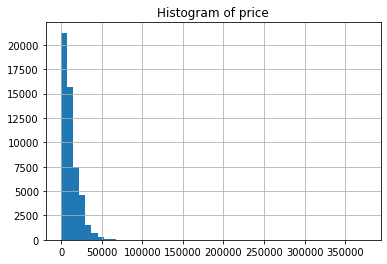

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [55]:
#Probamos que funciona con la columna price
his_desc(vehicles,'price',50)

**Conclusiones de `price`**

Podemos ver que nuestro histograma esta muy tirado hacia la izquierda y que esta sesgado hacia la derecha. Esto quiere decir que nuestra distribución de datos no es normal ya que tenemos varios valores atípicos que están causando que nuestra distribución se vea de esta manera. 

El "describe" nos permite ver que tenemos valores tan bajos como 1 dólar y valores tan altos como 375,000 dólares en los precios de nuestros vehículos. Podrían estos valores tan bajos y tan altos estar correctos? o podría deberse a algún error de recopilación de datos?

### `age`

Ahora analizaremos la distribucion de los años del vehículo cuando el anuncio se colocó

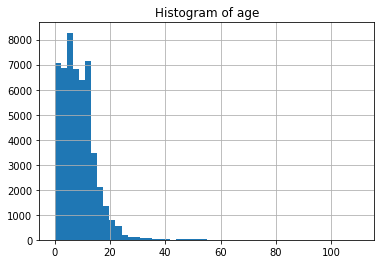

count    51525.000000
mean         8.491043
std          6.105618
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

In [56]:
#Utilizamos la funcion antes creada para crear un histograma de age
his_desc(vehicles,'age',50)

**Conclusiones de `age`**

Al igual que en `price` podemos ver que nuestro histograma de `age` esta sesgado hacia la derecha. Tenemos valores atípicos muy altos y por eso la figura se ve así. También podemos ver que la mejoría de nuestros datos se concentran entre 0 y 20 años. 

Al analizar el "describe" vemos que tenemos valores tan altos como 110 años y tan bajos como 0. Pienso que es normal tener carros con 0 años si estos son nuevos y estos parecen no ser un problema. Los valores que mas problemas nos traen son los valores elevados. Si vemos el percentil 3 nos dice que el 75% de nuestros vehículos tienen entre 0 y 12 años. Entonces solo el ultimo 25% tiene estos valores atípicos elevados. 


### `odometer`

Ahora analizaremos la distribucion del millaje

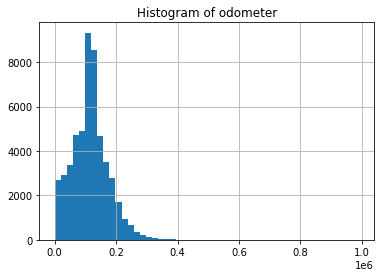

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

In [57]:
#Utilizamos la funcion antes creada para crear un histograma de odometer
his_desc(vehicles,'odometer',50)

**Conclusiones de `odometer`**

Al igual que en las dos columnas analizadas anteriormente, podemos ver el histograma esa segmentado hacia la derecha. L mayor cantidad de nuestros datos se encuentran entre las 0 y al rededor de las 200.000 millas. 

El "describe" nos muestra que tenemos valores tan bajos como 0 y tan altos como 990.000 de millaje. El 75% de nuestros datos están entre las 0 y 147.821 millas. Estos valores tan elevados podrían causarnos problemas al momento de analizar correlaciones con el precio. 

### `cylinders`

Ahora analizaremos la distribucion la distribucion del cilindraje

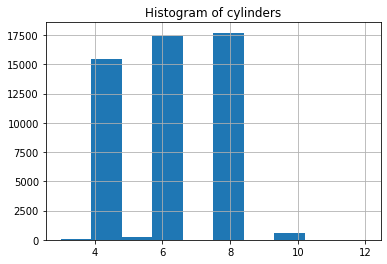

count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [58]:
#Utilizamos la funcion antes creada para crear un histograma de cylinders
his_desc(vehicles,'cylinders',10)

**Conclusiones de `cylinders`**

Este histograma se ve un poco más simétrico. Podemos ver que la mayoría de nuestros datos esta casi en el centro del grafico entre los motores de 4,6, y 8 cilindros. Los autos con motores de 3,10, y 12 cilindros no son muy comunes y por eso es normal tener pocos datos en estas partes del histograma. No me parece que tengas que hacer cambios aquí. 

### `condition`

Ahora analizaremos la distribucion la distribucion del las condiciones de los vehiculos

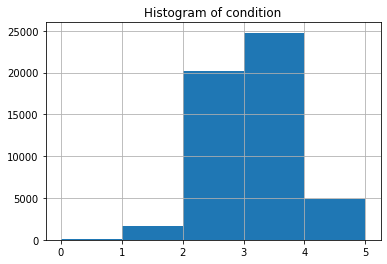

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

In [59]:
#Utilizamos la funcion antes creada para crear un histograma de condition
his_desc(vehicles,'condition',5)

**Conclusiones de `condition`**

Al igual que con `cylinders` esta distribución se ve mas normal que las anteriores. El grafico nos indica que la mayor cantidad de nuestros datos se encuentran entre las condiciones 2,3,y 4. Tenemos 6 diferentes tipos de condiciones, siendo 0 la mas mala condición y 5 la mejor. La mayoría de nuestros vehículos se encuentran en condiciones medias. No pienso que tengamos valores atípicos aquí o que necesitemos hacer alguna modificación. 

## Estudiar y tratar valores atípicos

En el análisis anterior pudimos encontrar tres columnas con valores atípicos que pueden afectar nuestro análisis. Estas columnas son `price`, `age`, y `odometer`. 

En esta sección vamos a decidir la mejor manera de segmentar nuestros datos para deshacernos de estos valores atípicos y no tener problemas al realizar nuestro análisis. 

Una de las mejores maneras de hacer nuestra segmentación en cada columna es utilizando la información que nos brinda el diagrama de caja o la información del describe que obtuvimos en la sección anterior. Tanto el diagrama de caja como el describe nos brindan los cuartiles 1 y 3 de nuestros datos. Con esta información podemos obtener el rango intercuartílico (IQR) y con esta información obtendremos nuestros limites superiores e inferiores para nuestra segmentación de datos. 

### `price`

In [60]:
# Primero determinos el IQR de price
p_Q1 = vehicles['price'].quantile(0.25)
p_Q3 = vehicles['price'].quantile(0.75)
p_IQR = p_Q3 - p_Q1
p_IQR

11839.0

In [61]:
# Determinamos el limite superior para price
p_h_l = p_Q3 + p_IQR
p_h_l

28678.0

In [62]:
# Determinamos el limite inferior para price
p_l_l = p_Q1 - p_IQR
p_l_l

-6839.0

Ya que nuestro valor inferior para el precio es un valore negativo y no podemos tener autos con valores negativos vamos a realizar otro análisis para nuestro limite inferior. Vamos a buscar el valor mas bajo que tiene los autos con la peor condición y vamos a utilizar este valor como limite inferior. 

In [63]:
# Buscamos el valor más bajo de los vehículos con la peor condición
l_p_c = vehicles[vehicles['condition'] == 0]
p_table(l_p_c,'condition','price','min')

,price
condition,
0,400


In [64]:
#Reasignamos el valor del limite inferior ara price
p_l_l = 400

### `age`

In [65]:
# Primero determinos el IQR de age
a_Q1 = vehicles['age'].quantile(0.25)
a_Q3 = vehicles['age'].quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_IQR

8.0

In [66]:
# Determinamos el limite superior de age
a_h_l = a_Q3 + a_IQR
a_h_l

20.0

In [67]:
# Determinamos el limite inferior de age
a_l_l = a_Q1 - a_IQR
a_l_l

-4.0

Aquí tenemos el mismo problema que en `price`. No podemos tenemos valores negativos como edad. Ya que los autos nuevos pueden tener 0 años de edad. Vamos a asignar a 0 como nuestro limite inferior. 

In [68]:
# Reasignamos el limite inferior de age
a_l_l = 0

### `odometer`

In [69]:
# Primero determinos el IQR de odometer
o_Q1 = vehicles['odometer'].quantile(0.25)
o_Q3 = vehicles['odometer'].quantile(0.75)
o_IQR = o_Q3 - o_Q1
o_IQR

72153.0

In [70]:
# Determinamos el limite superior de odometer
o_h_l = o_Q3 + o_IQR
o_h_l

219974.0

In [71]:
# Determinamos el limite inferior de odometer
o_l_l = o_Q1 - o_IQR
o_l_l

3515.0

En esta caso nuestros limites parece tener sentido. Por esta razón no vamos a modificar ninguno.

In [72]:
# Almacena los datos sin valores atípicos en un DataFrame separado
good_vehicles = vehicles.query(
    'price > @p_l_l & price < @p_h_l & odometer > @o_l_l & odometer < @o_h_l & age > @a_l_l & age < @a_h_l')

## Estudiar parámetros principales sin valores atípicos

Ahora que ya tenemos nuestra tabla son datos atípicos vamos a comparar nuestros histogramas con datos atípicos y sin datos atípicos para ver las diferencias. 

### `price`

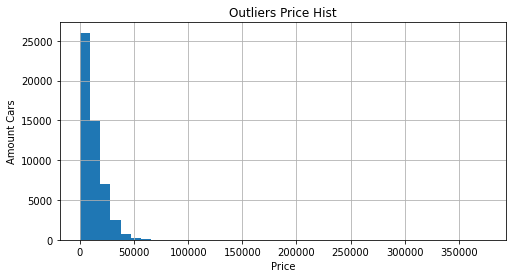

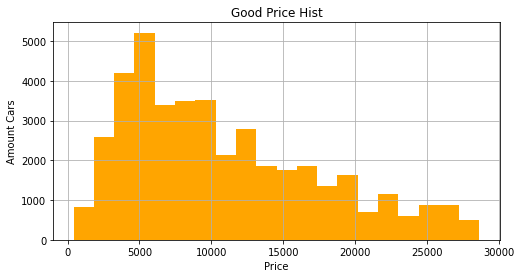

In [73]:
#Creamos un histograma con valores atípicos y otro sin valores atípicos para price
vehicles['price'].plot(kind='hist',title='Outliers Price Hist',bins=40,grid=True,figsize=(8,4))
plt.ylabel('Amount Cars')
plt.xlabel('Price')
plt.show() 
good_vehicles['price'].plot(kind='hist',title='Good Price Hist',bins=20,grid=True,figsize=(8,4),color='orange')
plt.ylabel('Amount Cars')
plt.xlabel('Price')
plt.show()

Ahora podemos ver que nuestro histograma de `price` se ve mas centrado que cuando tenemos todos esos datos atípicos. Sabemos que ahora toda nuestra información se encuentra entre los 400 y 30000 dólares.

### `age`

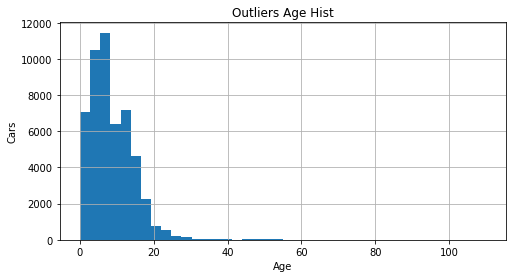

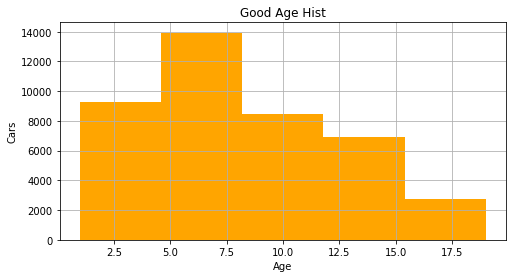

In [74]:
#Creamos un histograma con valores atípicos y otro sin valores atípicos para age
vehicles['age'].plot(kind='hist',title='Outliers Age Hist',bins=40,grid=True,figsize=(8,4))
plt.ylabel('Cars')
plt.xlabel('Age')
plt.show() 
good_vehicles['age'].plot(kind='hist',title='Good Age Hist',bins=5,grid=True,figsize=(8,4),color='orange')
plt.ylabel('Cars')
plt.xlabel('Age')
plt.show()

Podemos ver que lo mismo pasa con la distribución en nuestro histograma de `age` sin los valores atípicos.  Tenemos una distribución mas centrada y mas uniforme. 

### `odometer`

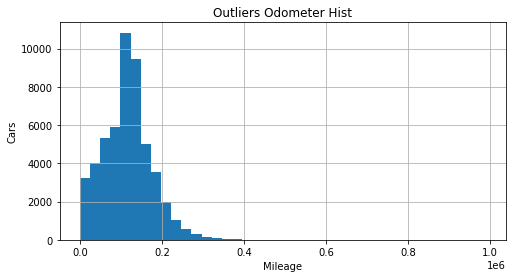

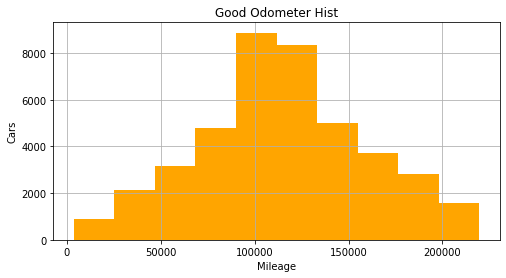

In [75]:
#Creamos un histograma con valores atípicos y otro sin valores atípicos para odometer
vehicles['odometer'].plot(kind='hist',title='Outliers Odometer Hist',bins=40,grid=True,figsize=(8,4))
plt.ylabel('Cars')
plt.xlabel('Mileage')
plt.show() 
good_vehicles['odometer'].plot(kind='hist',title='Good Odometer Hist',bins=10,grid=True,figsize=(8,4),color='orange')
plt.ylabel('Cars')
plt.xlabel('Mileage')
plt.show()

Lo mismo con esta nueva distribución. Tenemos una distribución mas centrada y uniforme sin valores muy exagerados. 

## Periodo de colocación de los anuncios

Ya con nuestros datos segmentados y sin valores atípicos, vamos a analizar la columna `days_listed`. Queremos saber lo siguiente:

- Media y mediana
- Periodo habitual de un anuncio 
- Cuando se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo

Para el periodo habitual del anuncio vamos a crear un histograma y un diagrama de caja junto con un "describe." Esta misma información nos ayudara a descifrar cuando se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo. 

In [76]:
#Primero vamos a obtener la media y mediana
print(good_vehicles['days_listed'].mean())
print()
print(good_vehicles['days_listed'].median())

39.57502663954277

33.0


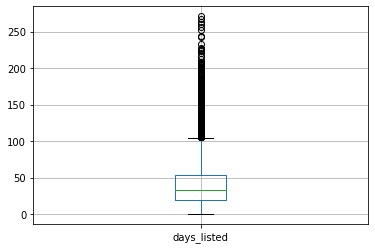

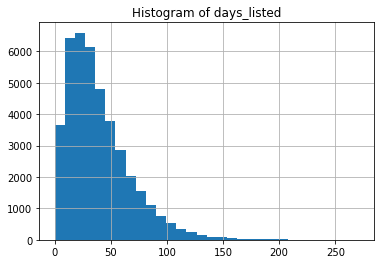

count    41292.000000
mean        39.575027
std         28.223015
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [77]:
#Ahora hacemos nuestros gráficos
good_vehicles.boxplot('days_listed')
his_desc(good_vehicles,'days_listed',30)


Para la última pregunta vamos a obtener los rangos intercuartílicos y obtener los limites de los bigotes de nuestro diagrama de caja. 

In [78]:
# Obtenemos el IQR y obtenemos los limites 
d_Q1 = good_vehicles['days_listed'].quantile(0.25)
d_Q3 = good_vehicles['days_listed'].quantile(0.75)
d_IQR = d_Q3 - d_Q1
d_IQR

#Limite inferior
d_l_l = d_Q1 - d_IQR
print(d_l_l)

#Limite superior
d_h_l = d_Q3 + d_IQR
print(d_h_l)

-15.0
87.0


**Conclusiones**

En nuestro histograma podemos ver que tenemos valores tan bajos como 0 días y valores tan altos como 250, o 271 según nuestro "describe." Pero también podemos ver que la mayoría de nuestros datos están entre los 0 y 70 días aproximadamente. 

En promedio los anuncios duran publicados unos 39 días. 

Si analizamos la información de nuestro "describe" podemos ver que el 75% de nuestros datos se encuentra entre 0 y 53 días. 

Para nuestra ultima pregunta, podemos ver que el tiempo anormalmente largo para un anuncio seria a partir de los 87 días. Y ya que nuestro limite inferior es negativo, yo diría que los anuncian se eliminan rápidamente cuando no duran ni un día; ósea el valor es 0.  


## Precio promedio por cada tipo de vehículo

Ahora vamos a analizar los precios por tipo de vehículo y también la cantidad de anuncios por tipo de vehículo. Nuestros objetivos son:

- Encontrar los dos tipos de vehículos con mayor cantidad de anuncios posteados.
- La dependencia del numero de anuncios por tipo de vehículos.
- El precio promedio para cada tipo de vehículo. 

In [79]:
#Creamos una tabla con la relación entre type, price, y ads. 
type_vehicles = p_table(good_vehicles,'type','price',['mean','count'])
type_vehicles.columns = ['mean_price','ads_count']
type_vehicles.reset_index(inplace=True)
type_vehicles

,type,mean_price,ads_count
0,SUV,10356.896538,10371
1,bus,7700.000000,2
2,convertible,13003.838710,279
3,coupe,13843.118624,1686
4,hatchback,6852.231102,926
5,mini-van,7924.582938,1055
6,offroad,14674.805755,139
7,other,10103.311558,199
8,pickup,14100.482591,4940
9,sedan,7022.126903,10906


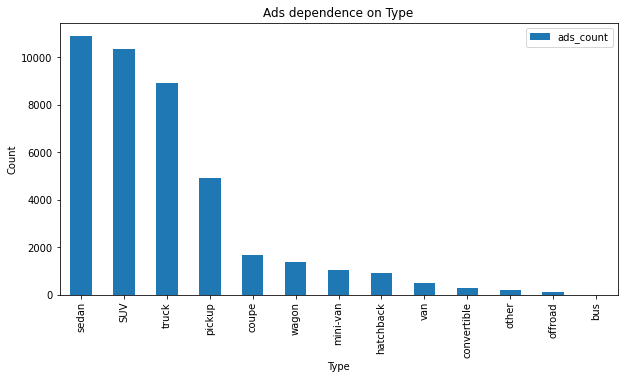

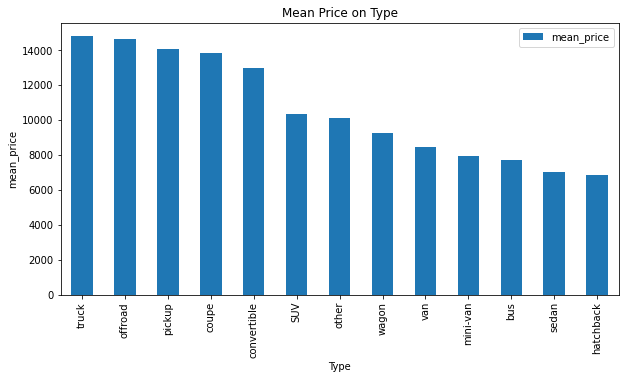

In [80]:
#Creamos un gráfico que muestra la dependencia de anuncios por vehículo.
type_vehicles.sort_values('ads_count',ascending=False).plot(
    kind='bar',figsize=(10,5),x='type',y='ads_count')
plt.title('Ads dependence on Type')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

#Creamos un gráfico que muestre los promedios de precio por vehículo.
type_vehicles.sort_values('mean_price',ascending=False).plot(
    kind='bar',figsize=(10,5),x='type',y='mean_price')
plt.title('Mean Price on Type')
plt.ylabel('mean_price')
plt.xlabel('Type')
plt.show()

**Concluciones**

Al ver nuestras graficas, nuestras preguntas se ven fácilmente respondidas. En nuestra primera grafica podemos ver de manera descendente de izquierda a derecha los vehículos con mayor cantidad de anuncios; en esta caso siendo los sedan y los SUV's los autos mas posteados con 10906 y 10371 anuncios respectivamente. Y siendo los bus los menos posteados; con una cantidad de solo dos anuncios. 

En nuestro grafico de precios promedios por vehículo de igual manera vemos de manera descendente de izquierda a derecha los vehículos con las medias de precios.  Siendo los dos vehículos con medias de precio mas altas los trucks y offroad con 14824 y 14674 dólares respectivamente. Y los vehículos con medias de precio mas bajas los sedan y hatchback con 7022 y 6852 dólares respectivamente. Me parece curioso que uno de los autos mas publicitados estén entre los dos mas económicos según su precio medio. 

## Factores de precio


Esta sección vamos a analizar la correlación entre algunos factores que pueden afectar el precio en los vehículos. Nuestro objetivo es saber que tan fuerte es la correlación entre el precio y los siguientes factores: 

- Edad
- Millaje
- Condición
- Tipo de transmisión
- Color

Para poder realizar este análisis vamos a tomar los dos tipos de vehículos mas posteados y vamos a hacer el análisis en cada uno de ellos. Vamos a crear un scatter matrix para analizar las variables numéricas y diagramas de caja para las variables categóricas y analizar los resultados. 


### `Sedan`

In [81]:
#Primero creamos una tabla para cada vehículo
sedan = good_vehicles[good_vehicles['type'] == 'sedan']
suv = good_vehicles[good_vehicles['type'] == 'SUV']

In [82]:
#Ahora creamos una matriz de correlación para sedan
sedan[['price','age','odometer','condition']].corr()

,price,age,odometer,condition
price,1.000000,-0.669393,-0.594361,0.290316
age,-0.669393,1.000000,0.548228,-0.289383
odometer,-0.594361,0.548228,1.000000,-0.344748
condition,0.290316,-0.289383,-0.344748,1.000000


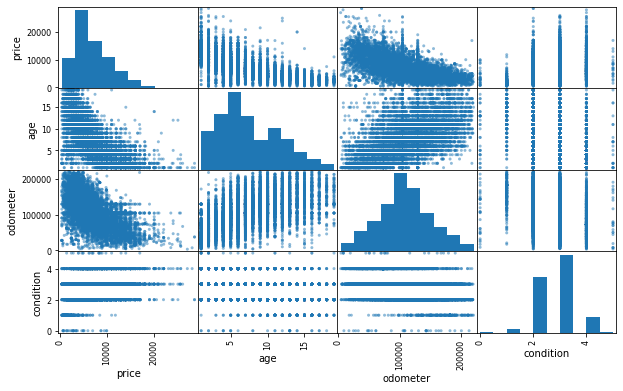

In [83]:
#Creamos un diagrama de correlación para las variables numéricas de sedan
pd.plotting.scatter_matrix(sedan[['price','age','odometer','condition']],figsize=(10,6))
plt.show()

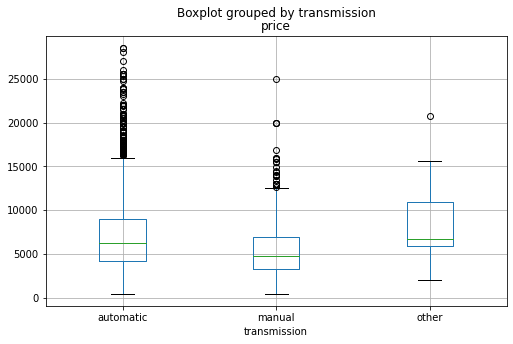

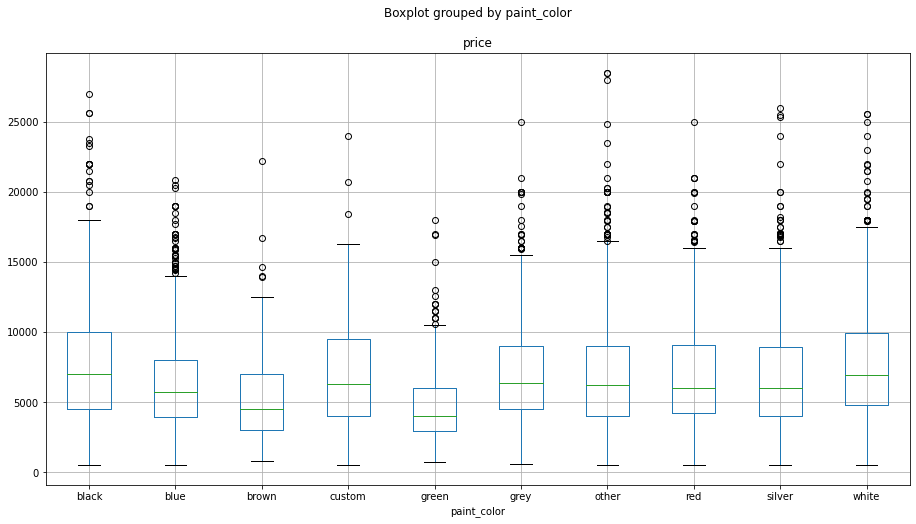

In [85]:
#Creamos diagramas de cajas para las variables categóricas de sedan
sedan.groupby('paint_color').filter(lambda x: len(x) >= 50).boxplot(
    column='price',by='transmission',figsize=(8,5))
plt.show()

sedan.groupby('paint_color').filter(lambda x: len(x) >= 50).boxplot(
    column='price',by='paint_color',figsize=(15,8))
plt.show()

**Conclusiones**

Al analizar nuestra matriz de correlación junto con el diagrama de correlación, podemos apreciar que tenemos algunas variables que se relacionan con el precio. 

Primero podemos ver que la edad del vehículo tiene una correlación de -0.67. Ya que la correlación es mayor a 0.5 podemos decir que es una correlación fuerte. Y ya que es negativa significa que a medida que los años aumentan, el precio disminuye. 

Lo mismo pasa con la relación entre el precio y el millaje. Tenemos una correlación de -0.59. También es una correlación fuerte y negativa; lo que quiere decir que mientras mas alto el millaje, mas bajo será el precio del vehículo. 

Por otro lado, la relación entre el precio y la condición del vehículo es baja o inexistente. Tenemos una correlación de 0.29. 

Estas mismas correlaciones las podemos distinguir en nuestro grafico. En la intersección de `price` y `age` podemos observar como a medida que la edad aumenta, el precio del vehiculo disminuye. Y al ver la intersección entre `price` y `odometer` podemos ver de igual manera que al aumentar el millaje el precio disminuye. 

Al analizar nuestros diagramas de caja tanto de `trasmission` y `paint_color` observamos lo siguiente. 

Los vehículos con la mediana mas baja son los de transmisión manual; seguidos por los de transmisión automática y los de otro tipo de transmisión. Sin embargo, también podemos observar que tenemos algunos vehículos de transmisión automático con precios incluso mas bajos que los de transmisión automática. 

En los diagramas de caja de `paint_color` vemos que las medianas de la mayoría de los colores son similares. Sin embargo podemos destacar que los vehículos negros y blacos tiene las medianas mas altas de nuestro conjunto. Y los vehículos cafes y verdes tiene las medianas mas bajas.  

Es importante aclara que aunque se hayan encontrado algunas correlaciones con algunas variables, no podemos concluir que estas variables son la causa de los precios altos o bajos. Para poder asignar causalidad aun tendríamos que hacer otros análisis. 

### `SUV`

In [84]:
#Ahora creamos una matriz de correlación para SUV
suv[['price','age','odometer','condition']].corr()

,price,age,odometer,condition
price,1.000000,-0.638988,-0.579796,0.244197
age,-0.638988,1.000000,0.541910,-0.275022
odometer,-0.579796,0.541910,1.000000,-0.323864
condition,0.244197,-0.275022,-0.323864,1.000000


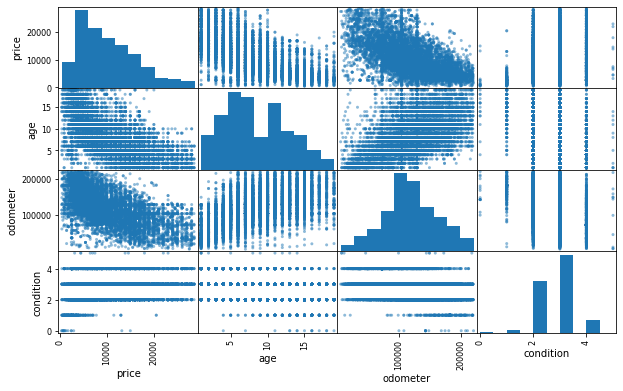

In [85]:
#Creamos un diagrama de correlación para las variables numéricas de SUV
pd.plotting.scatter_matrix(suv[['price','age','odometer','condition']],figsize=(10,6))
plt.show()

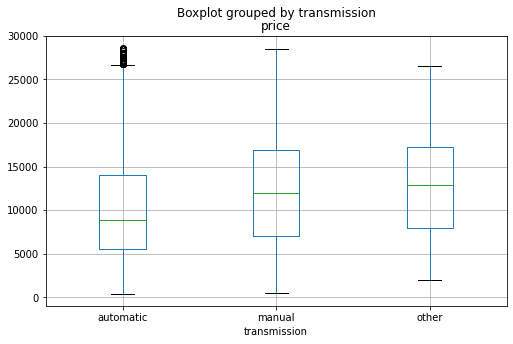

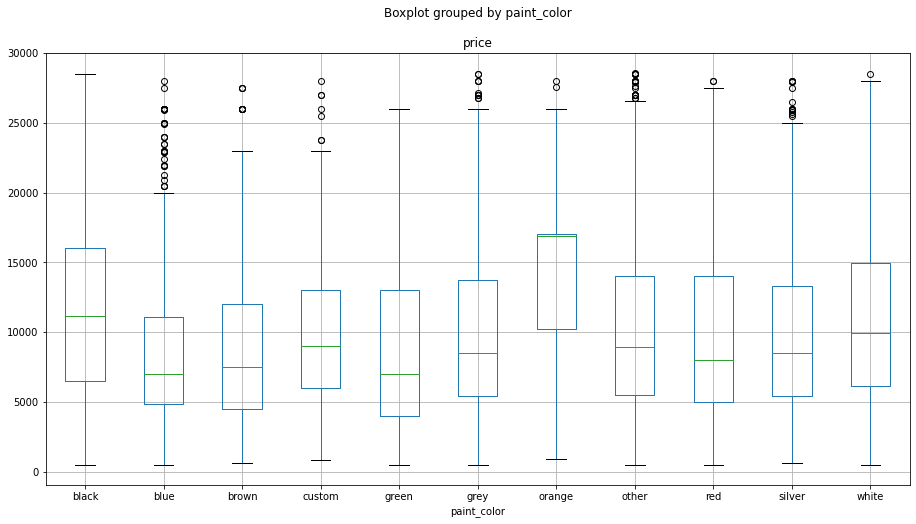

In [86]:
#Creamos diagramas de cajas para las variables categóricas de SUV
suv.groupby('paint_color').filter(lambda x: len(x) >= 50).boxplot(
    column='price',by='transmission',figsize=(8,5))
plt.show()

suv.groupby('paint_color').filter(lambda x: len(x) >= 50).boxplot(
    column='price',by='paint_color',figsize=(15,8))
plt.show()

**Conclusiones**

Al analizar nuestra matriz y diagrama de correlación obtenemos los mismos resultados que con sedan. Podemos observan una correlación fuerte entre `price`-`age` y  `price`-`odometer`. Al igual que con los sedan estas correlaciones son fuertes y negativas. Y de igual manera la correlación `price`-`condition` es inexistente. 

También podemos apreciar diagramas similares en las intersecciones de `price`-`age` y  `price`-`odometer` en nuestro diagrama de correlación. 

Al analizar nuestro diagrama de cajas de `transmission` podemos ver que tenemos resultados diferentes a los de sedan. En este caso, vemos que las transmisiones con medias mas bajas son los automáticos seguidos por los de transmisión manual y otros. Estos nos hace pensar que el tipo de transmisión no es algo que en realidad determina el precio de un vehículo. Este se debe ver afectado por otros factores mas haya del tipo de transmisión. 

De igual manera tenemos resultaos diferentes en nuestro diagrama de cajas para `paint_color`. Para lo SUVs tenemos los vehículos de color naranjacon la media mas alta pasado los 15000 y negro como los vehículos con medianas mas altas de precio. Y siendo los SUVs verde y azul aquellos con medianas mas bajas. Nuevamente esto nos dice que el color de un vehículo no determina su precio. Este se debe ver afectado por otros factores mas haya del color. 

## Conclusión general

**Valores Ausentes**

Identificamos que los valores ausentes de la columna `is_4wd` debía estar representada por valores 1s y 0s y que los valores ausentes debían ser 0s. Por esta razón remplazamos los valores ausentes con ceros. 

Eeemplazamos los valores ausente de la columna `model_year` con las medias según su condición. No encontramos una razón específica del porque hacían falta estos valores. 

Reemplazamos los valores ausentes en la columna `cylinders` con el tipo de cilindro mas común según su modelo de vehículo. Tampoco se encontró una razón exacta por la ausencia de valores en esta columna. 

Reemplazamos los valores ausentes de la columna `odometer` con los valores medianos segun `model_year` ya que concluimos que mientras mas antiguo el vehículo el millaje seria mayor. Tampoco se encontró una razón exacta por la ausencia de valores en esta columna. 

Reemplazamos todos los valores ausentes de `paint_color` con "other"

**Corregir tipos de datos**

Modificamos el tipo de dato de la columna `date_posted` a "datetime" ya que de esta manera seria mas sencillo manipular la información. 

**Enriquecer datos**

Agregamos una columna con el día de la semana en que se posteo cada anuncio.

Agregamos una columna con el mes en que se posteo cada anuncio.

Agregamos una columna con el año en que se posteo cada anuncio.

Agregamos una columna con la edad del vehículo el día en que se posteo el anuncio.

Agregamos una columna con el millaje promedio por año de cada vehículo. 

Modificamos los valores de la columna `condición` con valores del 0 al 5. 

**Valores Atípicos**

Eliminamos los valores atípicos de la columna `price` fijando los limites altos y bajos en 28678 y 400 dólares respectivamente. 

Eliminamos los valores atípicos de la columna `age` fijando los limites altos y bajos en 20 y 0 años respectivamente. 

Eliminamos los valores atípicos de la columna `odometer` fijando los limites altos y bajos en 219974 y 3515 millas respectivamente.

**Periodo de colocación de los anuncios**

En promedio los anuncios permanecen publicados 39 días. 

El 75% de los anuncios permanecen publicados entre 0 y 53 días.

El tiempo anormalmente largo para un anuncio seria a partir de los 87 días en adelante.

Los anuncian se eliminan rápidamente cuando no duran ni un día; ósea el valor es 0.

**Precio promedio por cada tipo de vehículo**

Los sedan y los SUVs son los autos mas posteados con 10906 y 10371 anuncios respectivamente. 

Los bus son los vehículos menos posteados con una cantidad de solo dos anuncios.

Los dos vehículos con medias de precio mas altas los trucks y offroad con 14824 y 14674 dólares respectivamente. 

Los vehículos con medias de precio mas bajas los sedan y hatchback con 7022 y 6852 dólares respectivamente.

**Factores de Precio**

**Los años de un vehículo influyen en su precio?**

**El millaje de un vehículo influyen en su precio?**

Tanto para los sedan como para los SUVs, las correlaciones `price`-`age` y `price`-`odometer` son negativamente fuertes. Esto quiere decir que mientras una de las variables sube la otra baja. Por ejemplo: Si el millaje o edad de un vehículo aumenta, el precio disminuye. 

**La condicion de un vehículo influyen en su precio?**

En la correlación `price`-`condition` se concluyo que no existe ninguna correlación por el porcentaje tan bajo obtenido en ambos análisis. 

Las medianas para la correlación `price`-`transmission` y `price`-`paint-color` fueron diferentes para los sedan y los SUVs. Con esto concluimos que la correlación es débil o inexistente y que el color o tipo de transmisión no afectan al precio directamente si no que deben haber otros factores que afecten al precio. 

También se concluyo que aunque hayamos encontrado algunas correlaciones fuertes, no podemos asignar causalidad. Ya que para hacer esto necesitamos aun hacer un análisis mas profundo y detallado. 